In [1]:
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import vgg16
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using TensorFlow backend.


In [2]:
datagen = image.ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [3]:
original_data_dir = 'C:/Python/keras_training/dogs-vs-cats/source/train'
base_dir = 'C:/Python/keras_training/dogs-vs-cats/dogs-vs-cats_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

In [4]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [5]:
img_path = fnames[3]

In [6]:
img = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

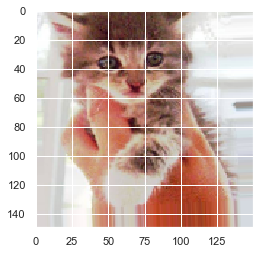

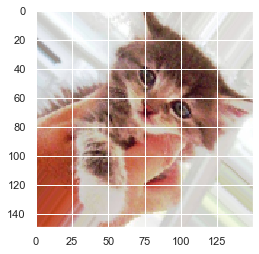

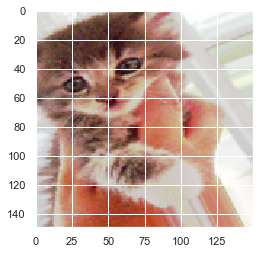

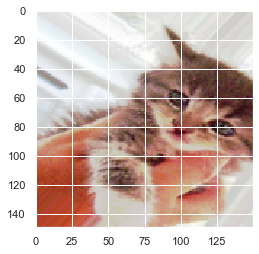

In [7]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [20]:
train_datagen = image.ImageDataGenerator(rescale=1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)

In [23]:
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.


In [25]:
validation_geneator = test_datagen.flow_from_directory(validation_dir,
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_geneator,
                             validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6909 - acc: 0.5241 - val_loss: 0.6796 - val_acc: 0.5838
Epoch 2/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6827 - acc: 0.5594 - val_loss: 0.6593 - val_acc: 0.6082
Epoch 3/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6691 - acc: 0.5822 - val_loss: 0.6486 - val_acc: 0.6212
Epoch 4/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6571 - acc: 0.6050 - val_loss: 0.6126 - val_acc: 0.6778
Epoch 5/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6390 - acc: 0.6312 - val_loss: 0.6189 - val_acc: 0.6612
Epoch 6/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6174 - acc: 0.6656 - val_loss: 0.5759 - val_acc: 0.6875
Epoch 7/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6082 - acc: 0.6619 - val_loss: 0.5652 - val_acc: 0.6967


Epoch 59/100
100/100 [==============================] - 15s 154ms/step - loss: 0.4109 - acc: 0.8125 - val_loss: 0.4367 - val_acc: 0.7977
Epoch 60/100
100/100 [==============================] - 16s 157ms/step - loss: 0.4119 - acc: 0.8034 - val_loss: 0.4592 - val_acc: 0.7830
Epoch 61/100
100/100 [==============================] - 16s 155ms/step - loss: 0.4162 - acc: 0.7978 - val_loss: 0.4290 - val_acc: 0.8080
Epoch 62/100
100/100 [==============================] - 15s 154ms/step - loss: 0.3986 - acc: 0.8134 - val_loss: 0.4168 - val_acc: 0.8160
Epoch 63/100
100/100 [==============================] - 15s 153ms/step - loss: 0.3989 - acc: 0.8147 - val_loss: 0.4806 - val_acc: 0.7796
Epoch 64/100
100/100 [==============================] - 16s 155ms/step - loss: 0.4095 - acc: 0.8175 - val_loss: 0.4377 - val_acc: 0.8125
Epoch 65/100
100/100 [==============================] - 15s 155ms/step - loss: 0.4032 - acc: 0.8141 - val_loss: 0.5258 - val_acc: 0.7563
Epoch 66/100
100/100 [===================

In [15]:
model.save('cats_vs_dogs_small_2.h5')

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

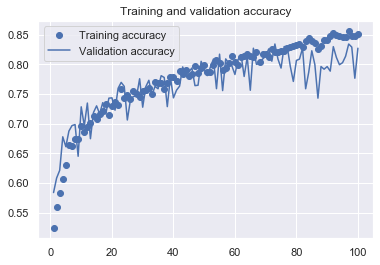

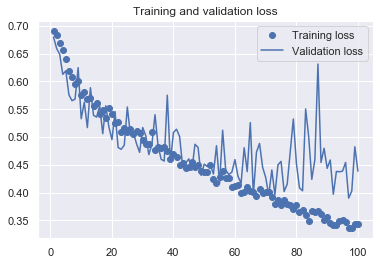

In [17]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [9]:
conv_base = vgg16.VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [10]:
datagen = image.ImageDataGenerator(rescale=1./255)
batch_size = 20

In [11]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for input_batch,labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [12]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [24]:
model = models.Sequential()
model.add(layers.Dense(265,
                       activation='relu',
                       input_dim=4*4*512))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [26]:
history = model.fit(train_features,
                   train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 601us/step - loss: 0.5957 - acc: 0.6710 - val_loss: 0.4307 - val_acc: 0.8530
Epoch 2/30
2000/2000 [==============================] - 1s 431us/step - loss: 0.4243 - acc: 0.8070 - val_loss: 0.3653 - val_acc: 0.8440
Epoch 3/30
2000/2000 [==============================] - 1s 433us/step - loss: 0.3469 - acc: 0.8535 - val_loss: 0.3139 - val_acc: 0.8850
Epoch 4/30
2000/2000 [==============================] - 1s 433us/step - loss: 0.3183 - acc: 0.8620 - val_loss: 0.3010 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 1s 433us/step - loss: 0.2865 - acc: 0.8815 - val_loss: 0.2837 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 1s 432us/step - loss: 0.2642 - acc: 0.8960 - val_loss: 0.2677 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 431us/step - loss: 0.2515 - acc: 0.9050 - val_loss: 0.2644 - val_acc: 0.8950


In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

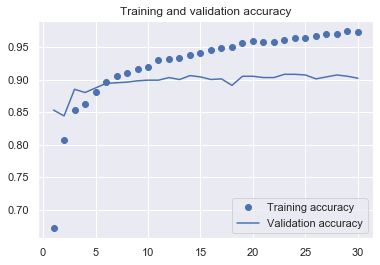

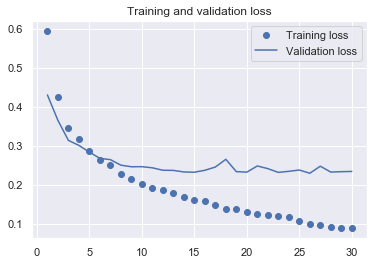

In [28]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [17]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
len(model.trainable_weights)

30

In [32]:
conv_base.trainable = False

In [33]:
len(model.trainable_weights)

4

In [34]:
model.compile(optimizer=optimizers.RMSprop(),
             loss='binary_crossentropy',
             metrics=['acc'])

In [36]:
%%time
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_geneator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 32s 317ms/step - loss: 0.7735 - acc: 0.6978 - val_loss: 0.3075 - val_acc: 0.8604
Epoch 2/30
100/100 [==============================] - 28s 285ms/step - loss: 0.4595 - acc: 0.7900 - val_loss: 0.2639 - val_acc: 0.8950
Epoch 3/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4057 - acc: 0.8203 - val_loss: 0.3379 - val_acc: 0.8477
Epoch 4/30
100/100 [==============================] - 29s 292ms/step - loss: 0.4069 - acc: 0.8172 - val_loss: 0.2646 - val_acc: 0.8905
Epoch 5/30
100/100 [==============================] - 29s 294ms/step - loss: 0.3987 - acc: 0.8153 - val_loss: 0.2437 - val_acc: 0.8995
Epoch 6/30
100/100 [==============================] - 29s 294ms/step - loss: 0.3653 - acc: 0.8375 - val_loss: 0.5211 - val_acc: 0.7874
Epoch 7/30
100/100 [==============================] - 29s 292ms/step - loss: 0.3507 - acc: 0.8356 - val_loss: 0.3621 - val_acc: 0.8312
Epoch 8/30
100/100 [==============================] - 2

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

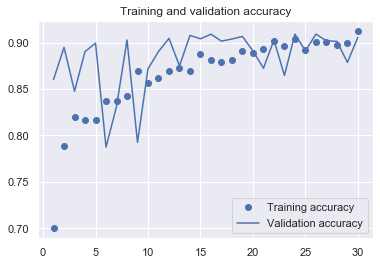

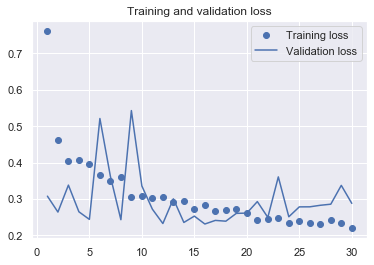

In [38]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [14]:
conv_base.trainable = True

In [15]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [27]:
%%time
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=40,
                             validation_data=validation_geneator,
                             validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
100/100 [==============================] - 74s 744ms/step - loss: 0.4517 - acc: 0.7759 - val_loss: 0.2293 - val_acc: 0.8997
Epoch 2/40
100/100 [==============================] - 70s 700ms/step - loss: 0.2691 - acc: 0.8881 - val_loss: 0.1461 - val_acc: 0.9433
Epoch 3/40
100/100 [==============================] - 71s 706ms/step - loss: 0.2216 - acc: 0.9128 - val_loss: 0.3293 - val_acc: 0.8744
Epoch 4/40
100/100 [==============================] - 70s 704ms/step - loss: 0.1618 - acc: 0.9281 - val_loss: 0.1377 - val_acc: 0.9491
Epoch 5/40
100/100 [==============================] - 71s 708ms/step - loss: 0.1431 - acc: 0.9459 - val_loss: 0.1395 - val_acc: 0.9416
Epoch 6/40
100/100 [==============================] - 71s 706ms/step - loss: 0.1341 - acc: 0.9444 - val_loss: 0.1156 - val_acc: 0.9575
Epoch 7/40
100/100 [==============================] - 70s 704ms/step - loss: 0.1065 - acc: 0.9538 - val_loss: 0.1092 - val_acc: 0.9626
Epoch 8

In [ ]:
%%time
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=40,
                             validation_data=validation_geneator,
                             validation_steps=50)

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

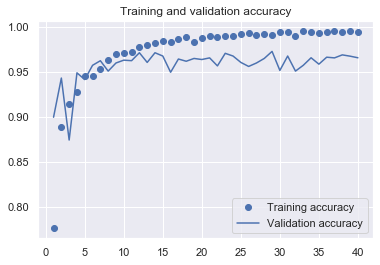

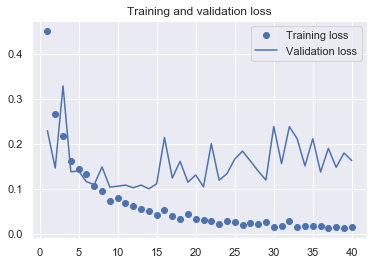

In [29]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [30]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc> ', test_acc)

test acc>  0.500000002682209


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
